# FCT Unesp - TCC Treino 3
Aluno: Pétrus Antonio Bárbosa Pradella

TCC2 - Treinando análise preditiva para dados de transações comerciais.

Teste 3
    - DataSet Utilizado: Weekly Sales Transactions
    - Fonte: Tableau Community
    - Link: https://community.tableau.com/docs/DOC-1236
    
    Dataset disponibilizado na "December Tableau User Group presentation" de 2017
    
Caracteristicas gerais do Dataset:

    - Número de Instancias: 9994
    - Número de Atributos: 20

### Importando as bibliotecas necessárias

In [1]:
from myownapi.AnalyticsARIMA import AnalyticsARIMA;

analytics  = AnalyticsARIMA();
analytics.getVersion()

'2.0.1z'

### Carregando a base de dados

In [2]:
onlineMode = False;

if onlineMode:
    dataset_folder_url = "http://downloads.finalcraft.com.br/tcc/SuperStoreData";
else:
    dataset_folder_url = "C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino4-Special";

dataset_file = dataset_folder_url + '/SuperStore.xls';

analytics.read_xls(dataset_file);
analytics.head(3)

Iniciando leitura do arquivo:
 --> C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino4-Special/SuperStore.xls
Arquivo lido com sucesso!


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Descrevendo o DataFrame

In [3]:
analytics.descreverAtributo('Category')

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

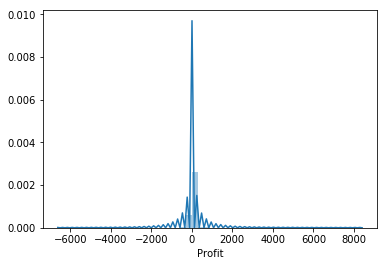

In [4]:
analytics.plotar('Profit')

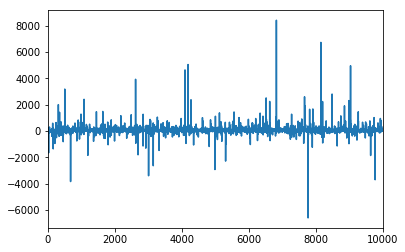

In [5]:
analytics.plotarSimple('Profit');


### Selecionando dados 

In [6]:
#Filtrando todo o data-set para pegar apenas aqueles que são da categoria Furniture

#Pegar todos os elemtnos cuja categoria 'category' é igual a 'Furniture';

furniture = analytics.pegarDataframeCondicionalmente('Category','Furniture')

#Reduzindo dataset para apenas dois valores, para que seja possivel aplicar ARIMA

analytics.setDataframe(furniture[['Order Date', 'Sales']]);

furniture = analytics.pegarDataframeAgrupadoPor('Order Date', 'Sales');

analytics.setDataframe(furniture);

print(furniture)

                Sales
Order Date           
2014-01-06  2573.8200
2014-01-07    76.7280
2014-01-10    51.9400
2014-01-11     9.9400
2014-01-13   879.9390
2014-01-14    61.9600
2014-01-16   127.1040
2014-01-19   181.4700
2014-01-20  1413.5100
2014-01-21    25.2480
2014-01-26   217.2000
2014-01-27   333.0000
2014-01-31   290.6660
2014-02-08    14.5600
2014-02-11  1650.0500
2014-02-12   129.5680
2014-02-18    25.1600
2014-02-20    20.3200
2014-03-01  1893.9950
2014-03-03   928.8020
2014-03-07   966.9840
2014-03-11     8.3200
2014-03-14  1139.9200
2014-03-15    45.6960
2014-03-17  3265.2300
2014-03-18  1462.4500
2014-03-19    25.0080
2014-03-21   251.3280
2014-03-22   314.3520
2014-03-24    40.4800
...               ...
2017-11-26  1375.6000
2017-11-27    65.7800
2017-11-28  4659.1400
2017-11-29   491.8880
2017-11-30  4129.7280
2017-12-01  2542.2920
2017-12-02  3527.5040
2017-12-03   591.8400
2017-12-04   992.7820
2017-12-05   321.4800
2017-12-07    82.3800
2017-12-08  3368.2650
2017-12-09

In [7]:
# Esse comando resample só pode ser usado em dataframes com index em TimeStamp (Ou seja, só serve para problemas de séries temporáis, como esse)

# Nesse caso, dando ressample com a média dos meses, mas poderia ser a soma do total vendido tambem...

analytics.ordenarDataframePor('Sales', unidadeDeTempo='MS', replaceInside=True); #Por padrão, ordena por MESES

analytics.head(20)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
Freq: MS, Name: Sales, dtype: float64

### Visualização dos Dados

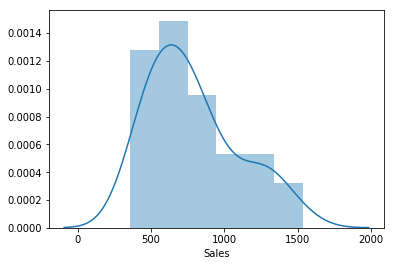

In [8]:
analytics.plotarSelf();

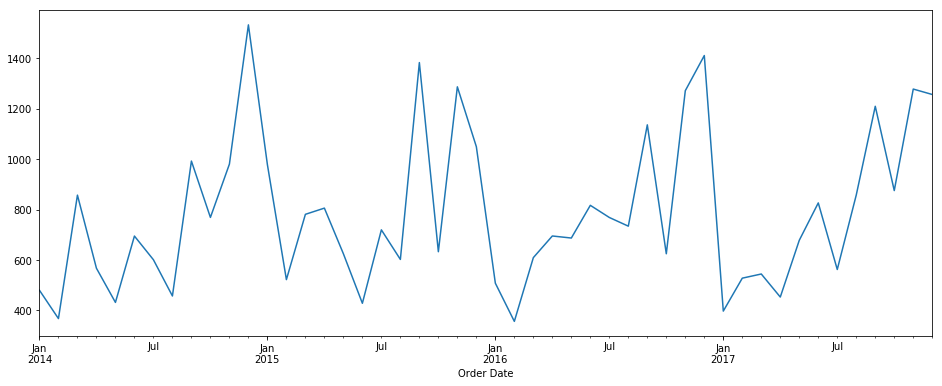

In [9]:
analytics.plotarSimpleSelf(theFigsize=(16,6));

<Figure size 1152x432 with 0 Axes>

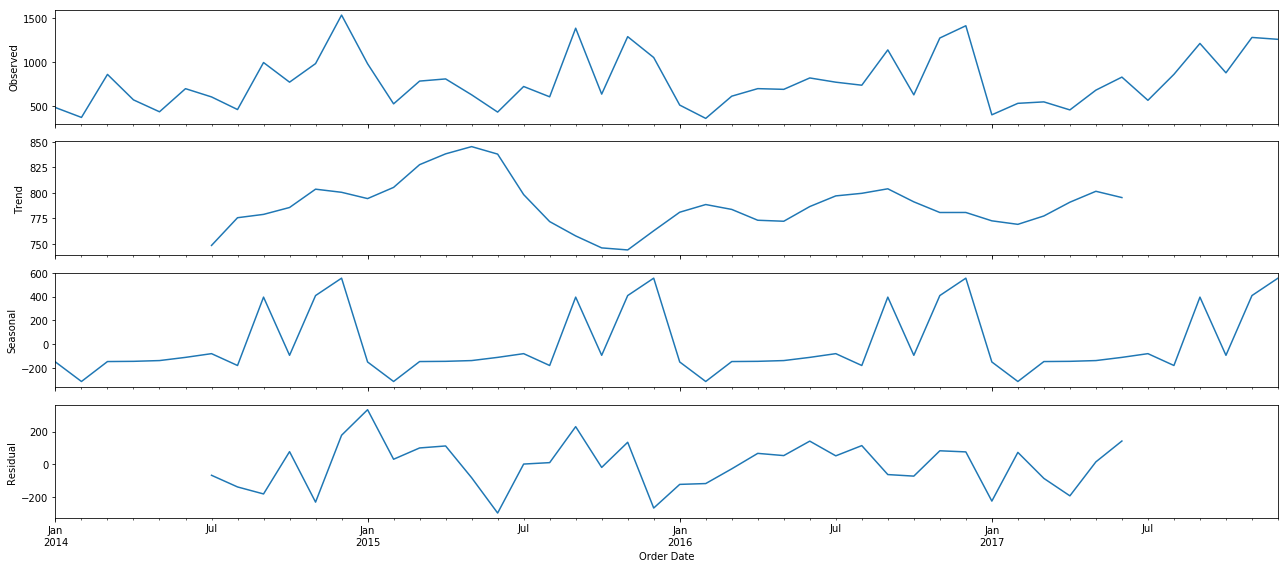

In [10]:
analytics.plotarDecomposicao(theFigsize=(16,6));

### Arima Predction

In [11]:
analytics.aplicarARIMA(verbose=True);


# ==============================================================================================================
# Preparando quantidade de treino.
# ==============================================================================================================


[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
# ==============================================================================================================
# Escolhendo a melhor combinação de parametros arima.
# ==============================================================================================================


ARIMA(0, 0, 0)x(0, 0, 0, 12)x12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)x12 - AIC:1539.0810235652464
ARIMA(0, 0, 0)x(0, 1, 0, 12)x12 - AIC:477.71701309202183
ARIMA(0, 0, 0)x(1, 0, 0, 12)x12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)x12 - AIC:1322.6700462015492
ARIMA(0, 0, 0)x(1, 1, 0, 12)x12 - AIC:318.00471991

#### Observação de Diagnóstico

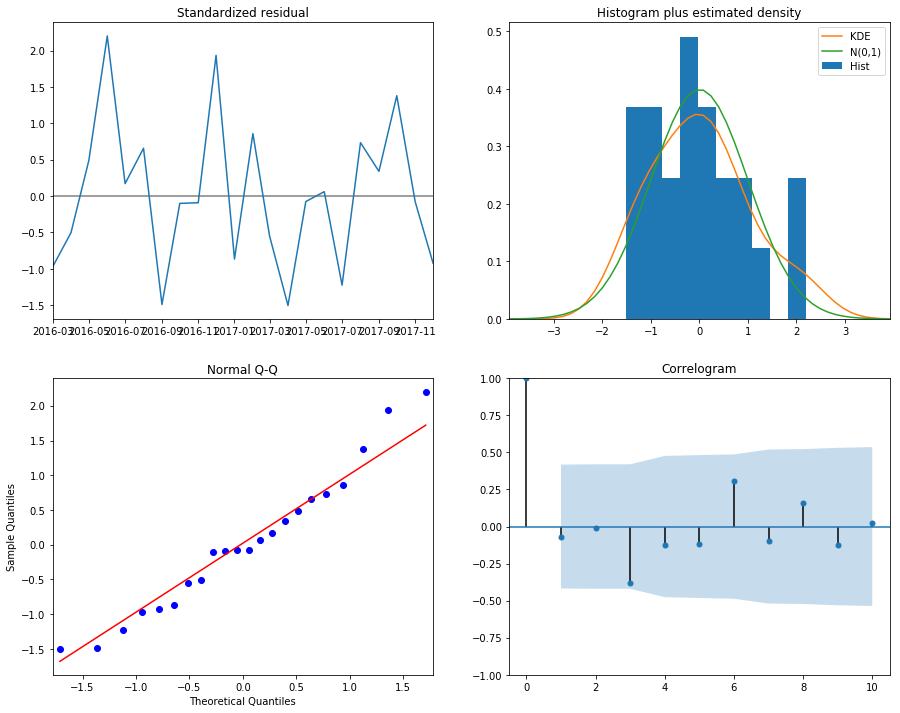

In [12]:
analytics.diagnostico()

### Forecast dos dados em modo de treino

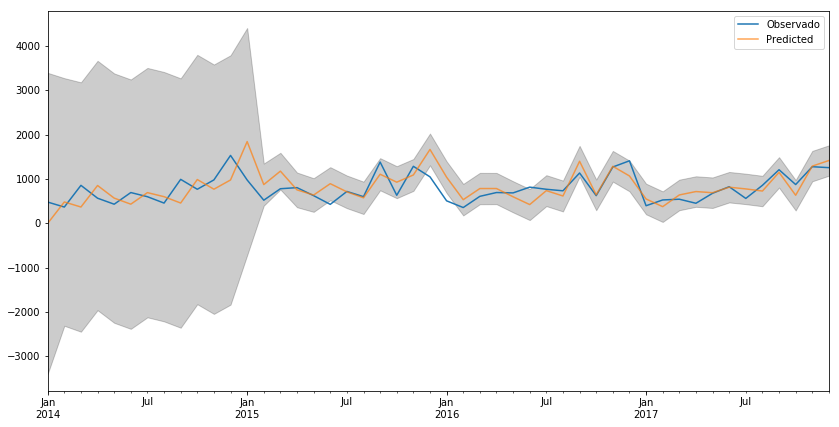

In [13]:
analytics.ARIMAPrediction()

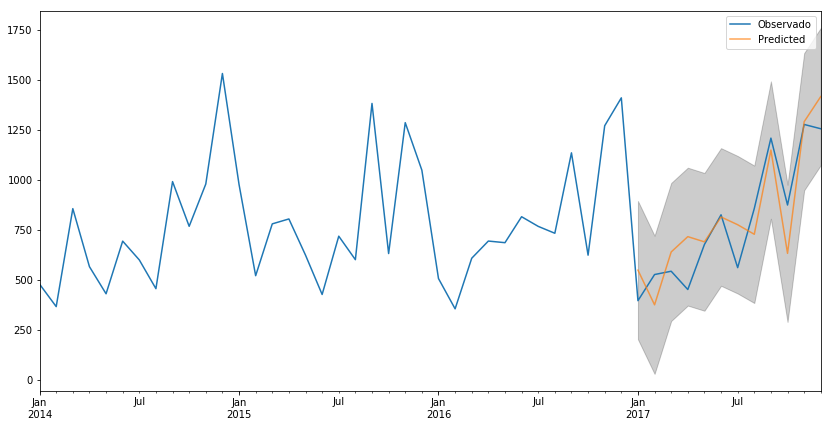

In [14]:
analytics.ARIMAPrediction('2017')


### Real Forecast

2018-01-01     408.746500
2018-02-01     534.435959
2018-03-01     556.941009
2018-04-01     470.052206
2018-05-01     689.155463
2018-06-01     836.844789
2018-07-01     578.371286
2018-08-01     865.379887
2018-09-01    1218.272795
2018-10-01     879.647880
2018-11-01    1288.280148
2018-12-01    1270.834041
2019-01-01     419.090624
2019-02-01     544.903828
2019-03-01     567.256670
2019-04-01     480.254317
2019-05-01     699.506960
2019-06-01     847.208150
2019-07-01     588.596379
2019-08-01     875.816319
2019-09-01    1228.677173
2019-10-01     890.165644
2019-11-01    1298.641537
2019-12-01    1281.092324
Freq: MS, dtype: float64


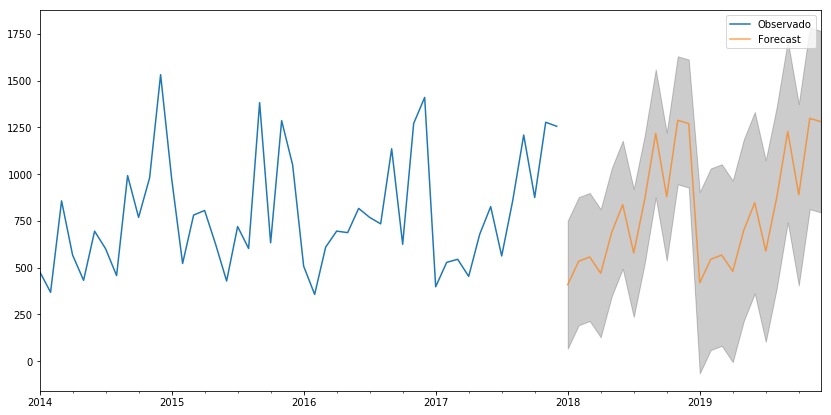

In [15]:
analytics.ARIMAForecast(24, verbose = True)